# Giant Magellan Telescope Images

In [1]:
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Diffraction limited image

The point source:

In [2]:
n = 512
src = ceo.Source("K",resolution=(n+1,n+1),magnitude=14)

The telescope:

In [3]:
tel = ceo.GMT(n+1,26.0)
src.masked(tel)

The imager sampling the GMT image at 4 times the Shannon criteria:

In [4]:
osf = 8
imgr = ceo.Imaging(1,n,DFT_osf=osf,N_PX_IMAGE=128)

In [5]:
imgr.propagate(src)

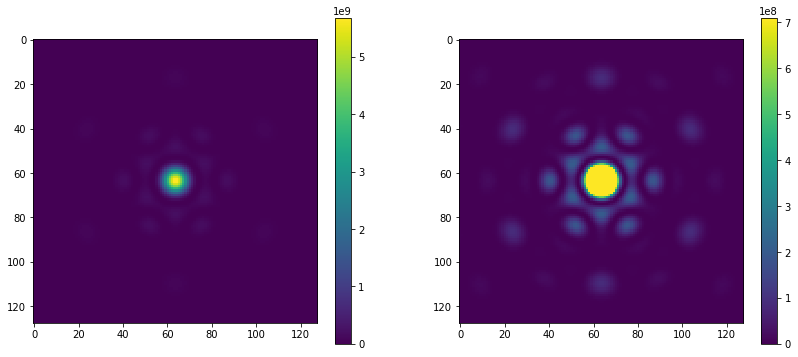

In [16]:
frame = imgr.frame.host()
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(frame,interpolation='None') 
colorbar(h1,ax=ax1)
h2 = ax2.imshow(frame,interpolation='None',vmax=np.max(frame)*0.125) 
colorbar(h2,ax=ax2)

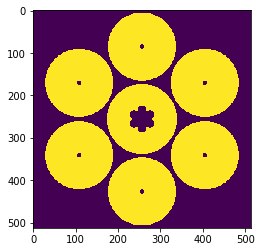

In [17]:
imshow(tel.f.host(shape=((n+1),(n+1))))

(263169,)


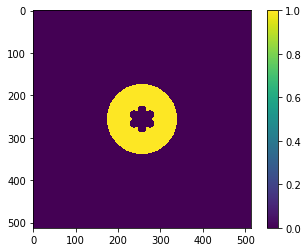

In [18]:
P = tel.piston_mask
print P[0][0].shape
imshow(np.reshape(P[0][6],((n+1),(n+1))))
colorbar()

[ 1.  2.  3.  4.  5.  6.  7.]


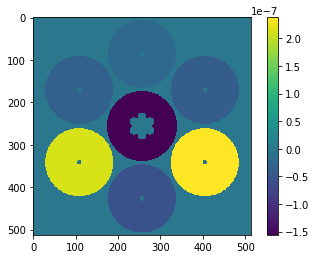

In [28]:
src.reset()
tel.set_gmt_piston(src.wavefront.phase,np.array(np.random.randn(8)*200e-9,dtype=np.single))
imshow(src.phase.host())
colorbar()
print np.arange(1,8,dtype=np.single)

In [29]:
print tel.get_gmt_piston(src.wavefront.phase)*1e9

[ -57.09387424  237.87425144  -40.32617231  -21.67101715  -33.60404488
  213.62193566 -155.73471723]


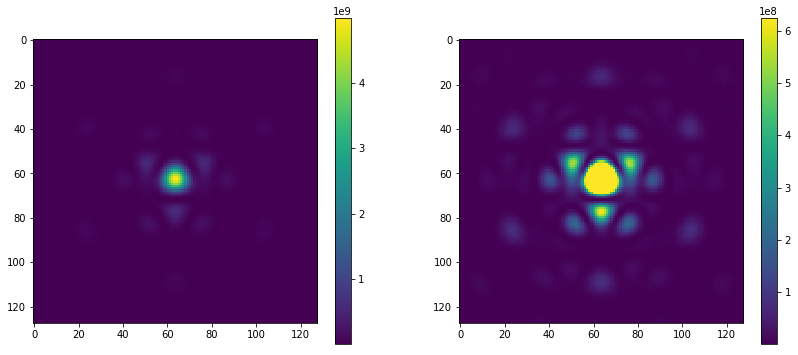

In [30]:
src.masked(tel)
imgr.reset()
imgr.propagate(src)
frame = imgr.frame.host()
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(frame,interpolation='None') 
colorbar(h1,ax=ax1)
h2 = ax2.imshow(frame,interpolation='None',vmax=np.max(frame)*0.125) 
colorbar(h2,ax=ax2)

## Turbulence images

In [11]:
gs = ceo.Source("K",resolution=(n+1,n+1),magnitude=14)
gs.masked(tel)
atm = ceo.Atmosphere(15e-2,30,wind_speed=10)

In [12]:
imgr1 = ceo.Imaging(1,n,N_PX_IMAGE=128)

In [13]:
p = 25.5/n
print p*1e2

4.98046875


### Snapshot image at T=1s

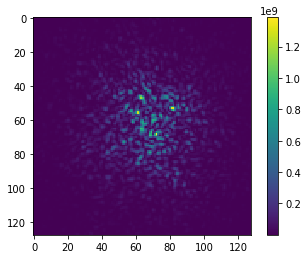

In [14]:
imgr1.reset()
atm.get_phase_screen(gs,p,n+1,p,n+1,1)
imgr1.propagate(gs)
ax = imshow(imgr1.frame.host(),interpolation='None') 
colorbar(ax)

### Snapshot image at T=2s

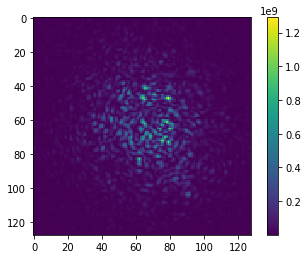

In [15]:
imgr1.reset()
atm.get_phase_screen(gs,p,n+1,p,n+1,2)
imgr1.propagate(gs)
ax = imshow(imgr1.frame.host(),interpolation='None') 
colorbar(ax)

### Snapshot image at T=10s

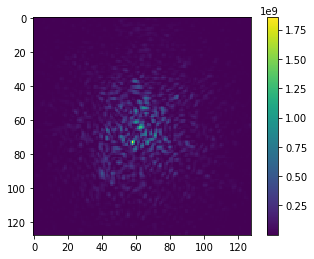

In [16]:
imgr1.reset()
atm.get_phase_screen(gs,p,n+1,p,n+1,10)
imgr1.propagate(gs)
ax = imshow(imgr1.frame.host(),interpolation='None') 
colorbar(ax)

### 20s exposure image sampled every 0.1s

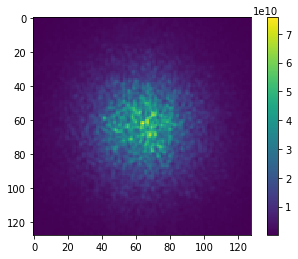

In [17]:
imgr1.reset()
tau = 1e-1
T = 0.0
tid = ceo.StopWatch()
tid.tic()
while T<=20:
    T += tau
    atm.get_phase_screen(gs,p,n+1,p,n+1,T)
    imgr1.propagate(gs)
tid.toc()
ax = imshow(imgr1.frame.host(),interpolation='None') 
colorbar(ax)